In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# 1- Explaining the problem

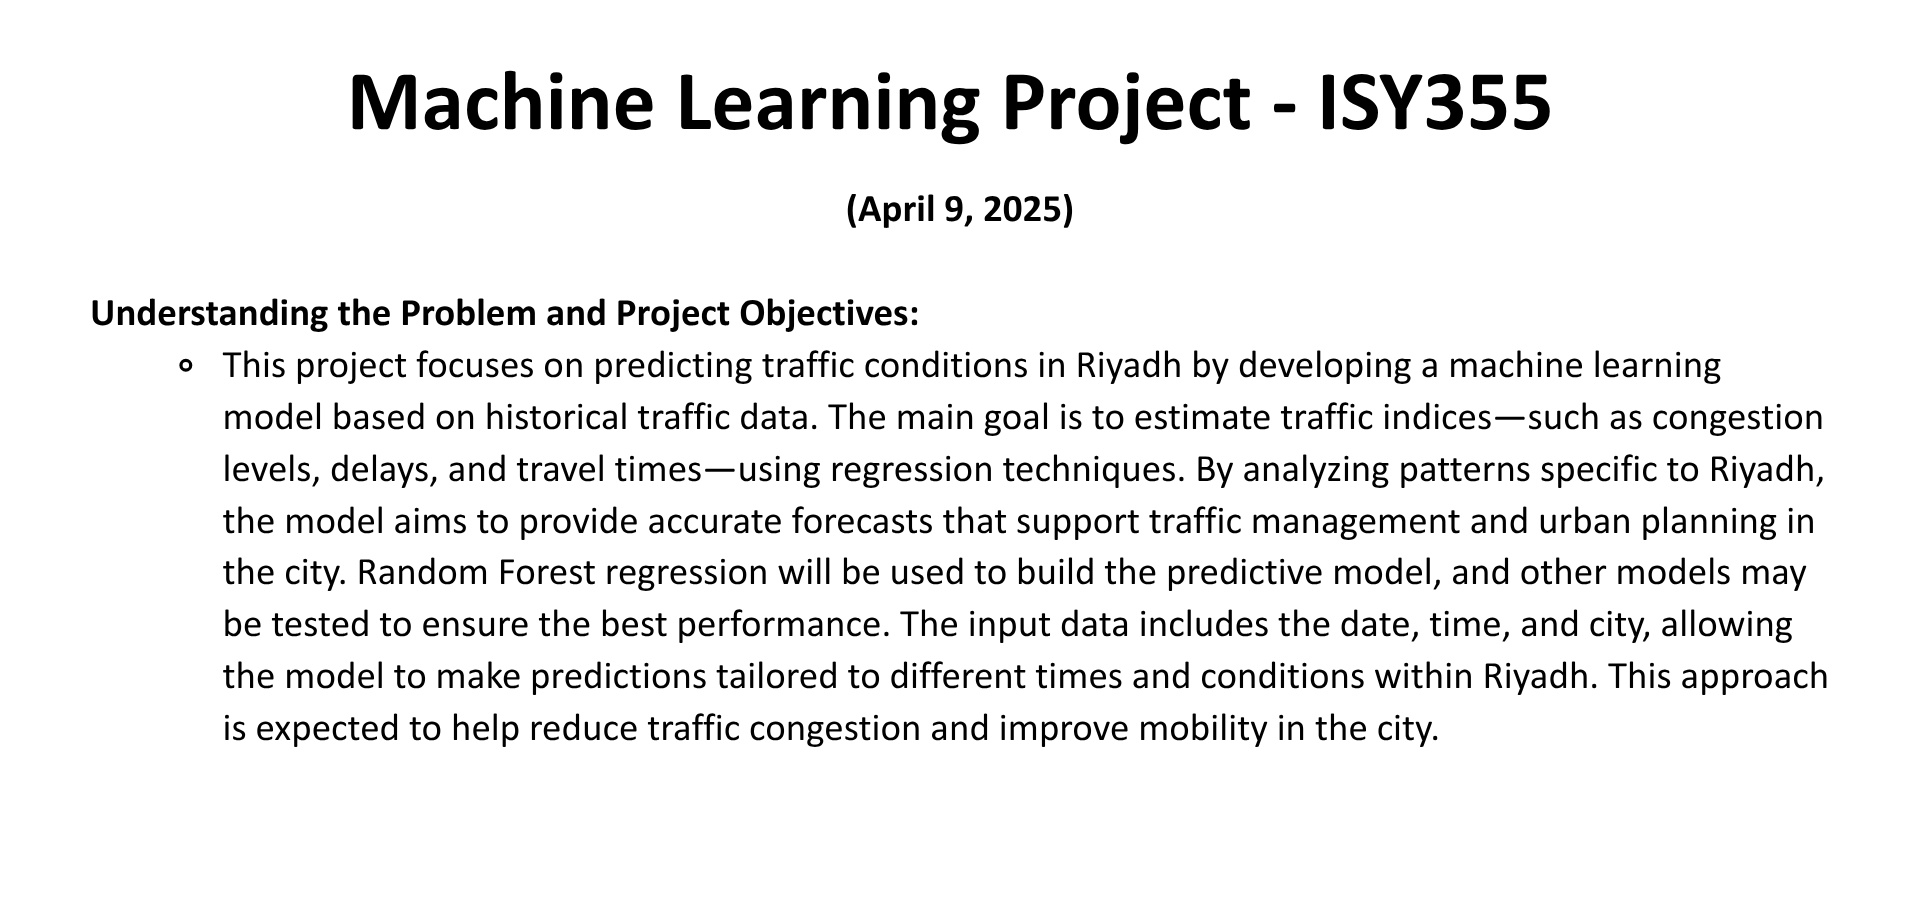

# 2- Gathering Data

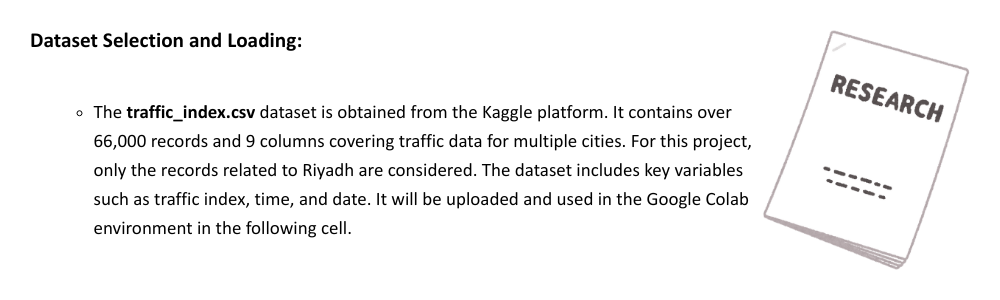

In [ ]:
# Loaded the dataset from a local CSV file
df = pd.read_csv("/content/traffic_index.csv")
# Displayed the first five rows to preview the dataset
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


# 3- Data Preparation

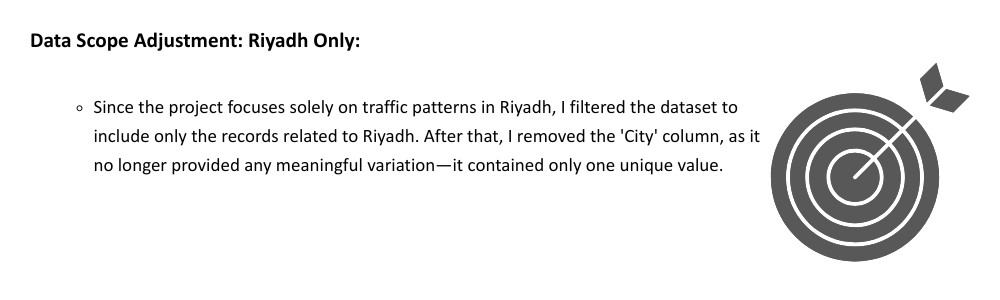

In [ ]:
# Filtered the dataset to include only rows related to Riyadh
df = df[df['City']=='Riyadh']
# Dropped the 'City' column since all remaining rows refer to Riyadh
df = df.drop(columns=['City'])
# Displayed the first five rows to confirm the result
df.head()

,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
57947,2022-12-16 12:46:30,5,33,115.0,13.7,6,NaN,NaN
57948,2022-12-16 13:46:30,6,57,197.6,39.4,11,NaN,NaN
57949,2022-12-16 14:46:30,10,78,311.7,72.7,17,NaN,NaN
57950,2022-12-16 15:46:30,13,127,508.1,105.1,17,NaN,NaN
57951,2022-12-16 16:46:00,21,184,838.1,153.4,26,NaN,NaN


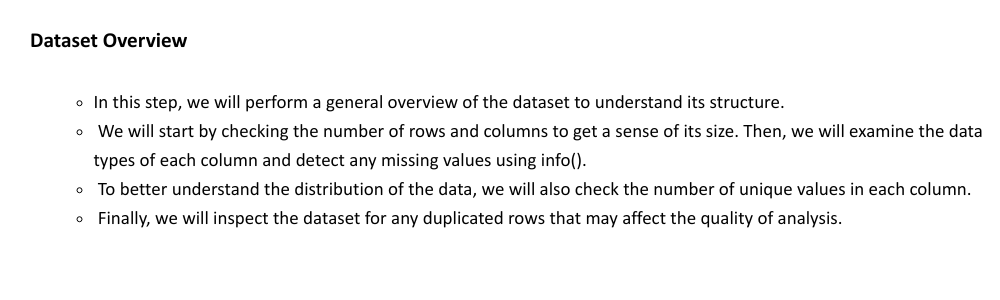

In [ ]:
# Displayed the number of rows and columns in the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

# Displayed column data types and checked for missing values
df.info()

# Checked how many unique values each column contains
df.nunique()

# Checked for duplicated rows in the dataset
df.duplicated().sum()


Dataset contains 8692 rows and 8 columns
<class 'pandas.core.frame.DataFrame'>
Index: 8692 entries, 57947 to 66638
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datetime             8692 non-null   object 
 1   TrafficIndexLive     8692 non-null   int64  
 2   JamsCount            8692 non-null   int64  
 3   JamsDelay            8692 non-null   float64
 4   JamsLength           8692 non-null   float64
 5   TrafficIndexWeekAgo  8692 non-null   int64  
 6   TravelTimeHistoric   7919 non-null   float64
 7   TravelTimeLive       7919 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 869.2+ KB


np.int64(0)

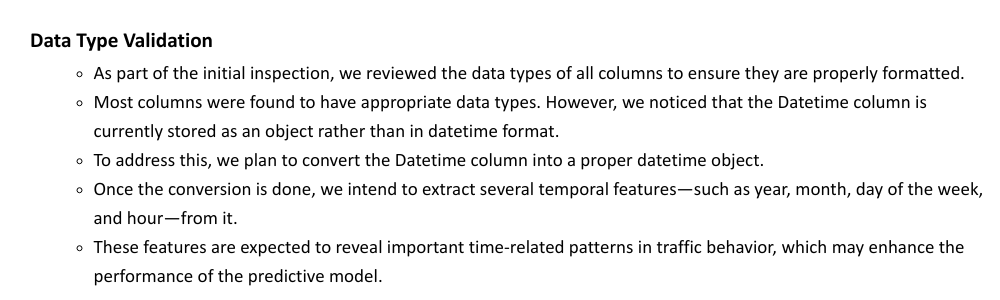

In [ ]:
# Converted the 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Checked updated data types to confirm the conversion
df.dtypes

,0
Datetime,datetime64[ns]
TrafficIndexLive,int64
JamsCount,int64
JamsDelay,float64
JamsLength,float64
TrafficIndexWeekAgo,int64
TravelTimeHistoric,float64
TravelTimeLive,float64


In [ ]:
# Created new time-based features from the 'Datetime' column
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month_name()
df['MonthNum'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day_name()
df['DayNum'] = df['Datetime'].dt.dayofweek
df['Hour'] = df['Datetime'].dt.hour

# Displayed the first five rows to verify the new columns
df.head()

,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour
57947,2022-12-16 12:46:30,5,33,115.0,13.7,6,NaN,NaN,2022,December,12,Friday,4,12
57948,2022-12-16 13:46:30,6,57,197.6,39.4,11,NaN,NaN,2022,December,12,Friday,4,13
57949,2022-12-16 14:46:30,10,78,311.7,72.7,17,NaN,NaN,2022,December,12,Friday,4,14
57950,2022-12-16 15:46:30,13,127,508.1,105.1,17,NaN,NaN,2022,December,12,Friday,4,15
57951,2022-12-16 16:46:00,21,184,838.1,153.4,26,NaN,NaN,2022,December,12,Friday,4,16


# 4- Data Wrangling

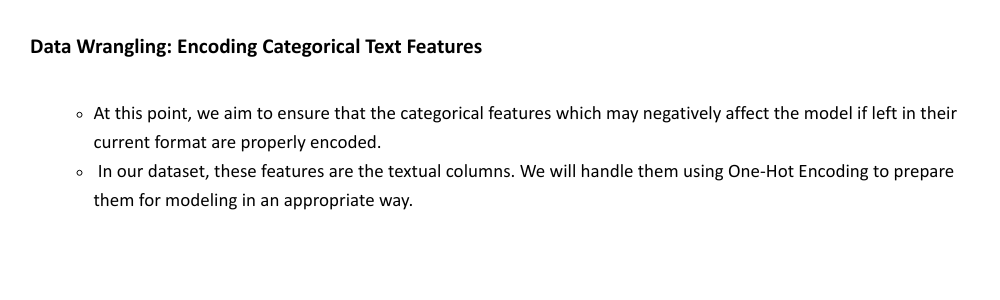

In [ ]:
# Displayed data types of all columns to confirm format before encoding
df.dtypes

Datetime               datetime64[ns]
TrafficIndexLive                int64
JamsCount                       int64
JamsDelay                     float64
JamsLength                    float64
TrafficIndexWeekAgo             int64
TravelTimeHistoric            float64
TravelTimeLive                float64
Year                            int32
Month                          object
MonthNum                        int32
Day                            object
DayNum                          int32
Hour                            int32
dtype: object

In [ ]:
# Applied One-Hot Encoding to the 'Month' and 'Day' categorical columns
df_encoded = pd.get_dummies(df, columns=['Month', 'Day'], drop_first=True)

# Displayed the first few rows of the encoded dataset
df_encoded.head()

,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Year,MonthNum,...,Month_May,Month_November,Month_October,Month_September,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
57947,2022-12-16 12:46:30,5,33,115.0,13.7,6,NaN,NaN,2022,12,...,False,False,False,False,False,False,False,False,False,False
57948,2022-12-16 13:46:30,6,57,197.6,39.4,11,NaN,NaN,2022,12,...,False,False,False,False,False,False,False,False,False,False
57949,2022-12-16 14:46:30,10,78,311.7,72.7,17,NaN,NaN,2022,12,...,False,False,False,False,False,False,False,False,False,False
57950,2022-12-16 15:46:30,13,127,508.1,105.1,17,NaN,NaN,2022,12,...,False,False,False,False,False,False,False,False,False,False
57951,2022-12-16 16:46:00,21,184,838.1,153.4,26,NaN,NaN,2022,12,...,False,False,False,False,False,False,False,False,False,False


# 5- Analyze Data

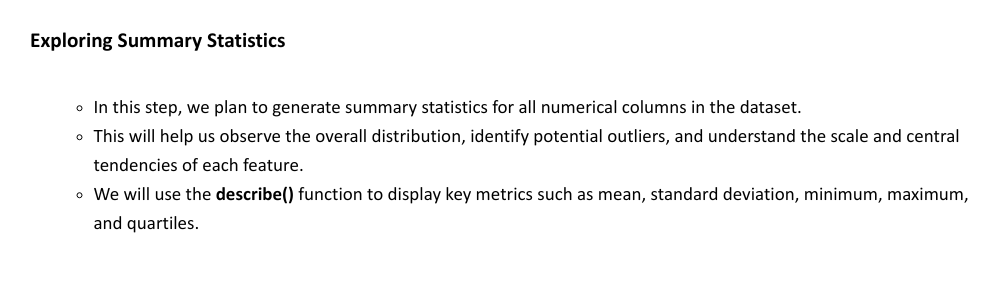

In [ ]:
# Displayed summary statistics for numerical columns
df.describe()

,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Year,MonthNum,DayNum,Hour
count,8692,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,7919.000000,7919.000000,8692.000000,8692.000000,8692.000000,8692.000000
mean,2023-06-16 14:02:45.985273600,23.173263,145.902324,620.349390,138.221238,23.181661,72.786763,74.215896,2022.957202,6.516682,2.993327,11.500690
min,2022-12-16 12:46:30,0.000000,0.000000,0.000000,0.000000,0.000000,52.683439,50.283013,2022.000000,1.000000,0.000000,0.000000
25%,2023-03-17 00:46:30,7.000000,30.000000,107.875000,17.900000,7.000000,66.329747,62.714012,2023.000000,4.000000,1.000000,5.000000
50%,2023-06-17 05:31:30,22.000000,113.000000,436.650000,108.850000,22.000000,73.108890,73.843328,2023.000000,7.000000,3.000000,12.000000
75%,2023-09-15 18:27:37.500000,35.000000,225.000000,913.875000,214.525000,35.000000,78.366752,83.403140,2023.000000,10.000000,5.000000,18.000000
max,2023-12-15 07:01:30,99.000000,883.000000,5466.300000,932.900000,99.000000,94.778321,130.973104,2023.000000,12.000000,6.000000,23.000000
std,NaN,17.950651,132.559666,641.133188,132.036582,17.913195,8.939982,13.629161,0.202413,3.445227,2.002691,6.929573


In [ ]:
# Disabled warning messages to keep the output clean
import warnings
warnings.filterwarnings('ignore')

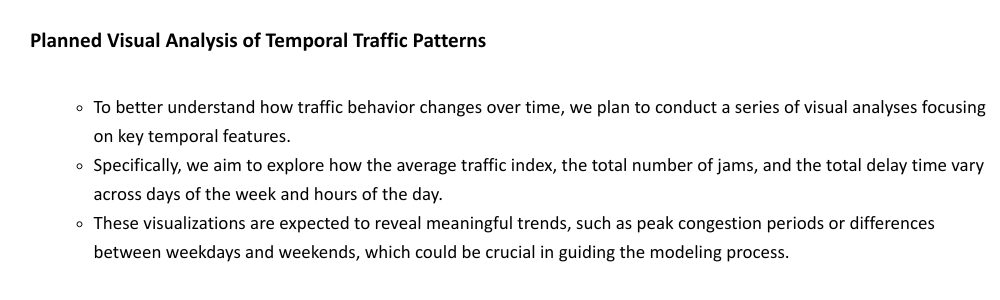

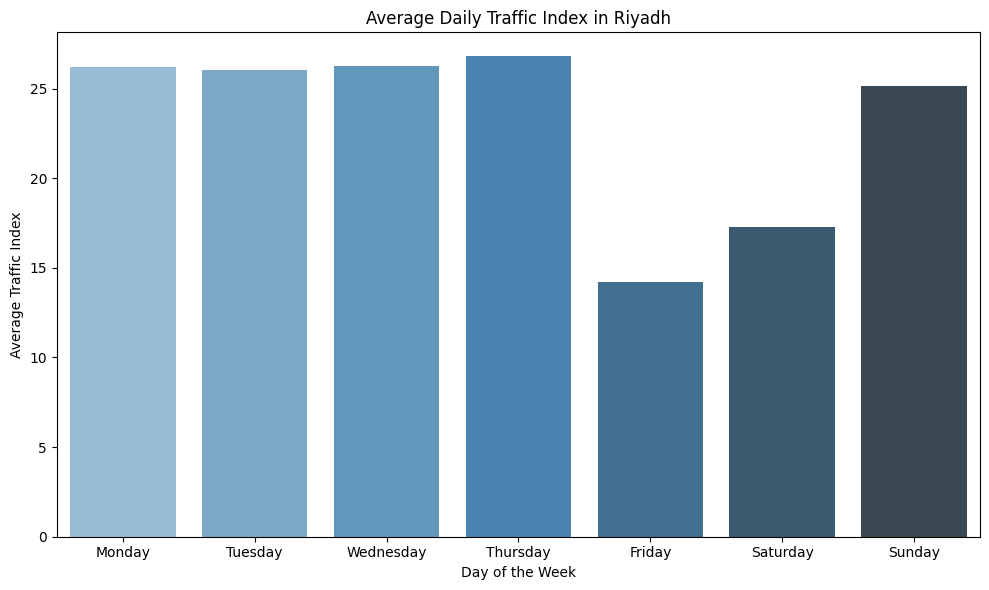

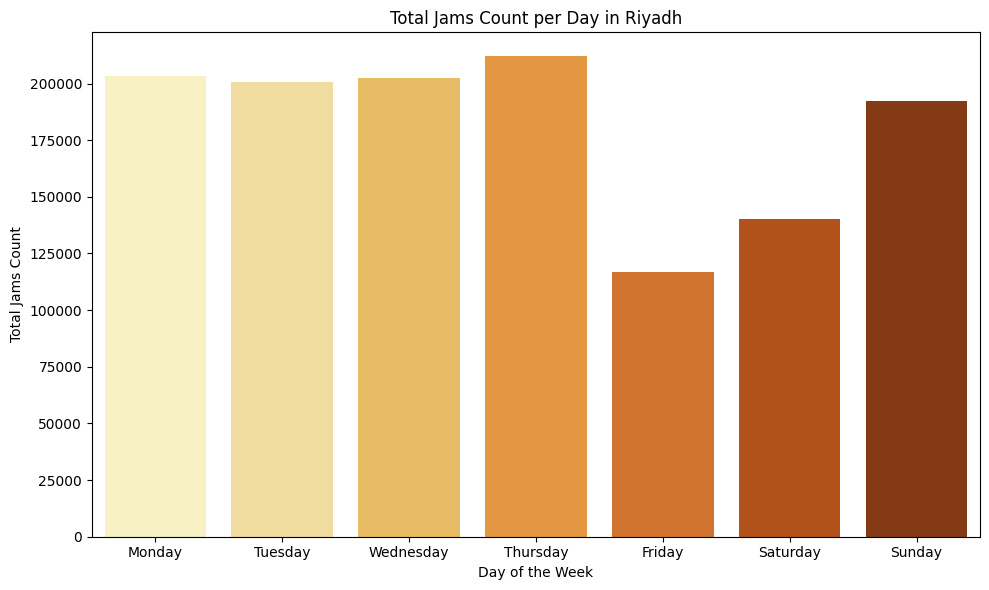

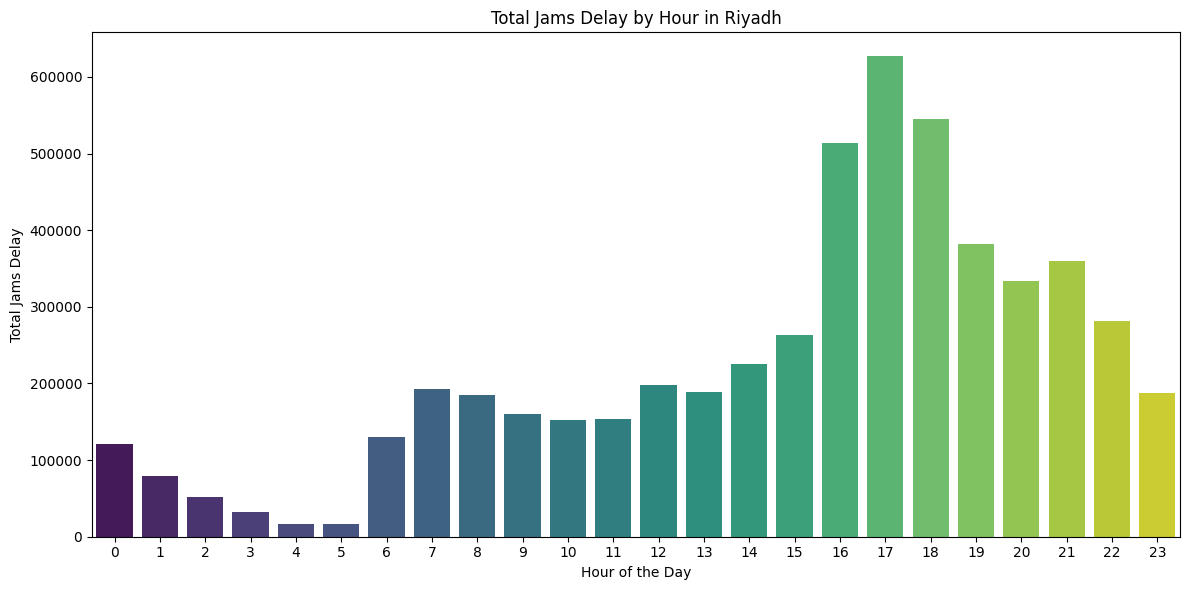

In [ ]:
# Calculated the average traffic index for each day of the week
daily_avg = df.groupby('Day')['TrafficIndexLive'].mean().reset_index()

# Ordered the days of the week for proper visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg['Day'] = pd.Categorical(daily_avg['Day'], categories=days_order, ordered=True)
daily_avg = daily_avg.sort_values('Day')

# Plotted average daily traffic index
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='TrafficIndexLive', data=daily_avg, palette='Blues_d')
plt.title('Average Daily Traffic Index in Riyadh')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Index')
plt.tight_layout()
plt.show()

# Calculated total number of traffic jams per day
daily_jams = df.groupby('Day')['JamsCount'].sum().reset_index()

# Ordered the days of the week for proper visualization
daily_jams['Day'] = pd.Categorical(daily_jams['Day'], categories=days_order, ordered=True)
daily_jams = daily_jams.sort_values('Day')

# Plotted total jams count by day
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='JamsCount', data=daily_jams, palette='YlOrBr')
plt.title('Total Jams Count per Day in Riyadh')
plt.xlabel('Day of the Week')
plt.ylabel('Total Jams Count')
plt.tight_layout()
plt.show()

# Calculated total delay time by hour
hourly_delay = df.groupby('Hour')['JamsDelay'].sum().reset_index()

# Plotted total delay time by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='JamsDelay', data=hourly_delay, palette='viridis')
plt.title('Total Jams Delay by Hour in Riyadh')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Jams Delay')
plt.tight_layout()
plt.show()


# 6- Train Model

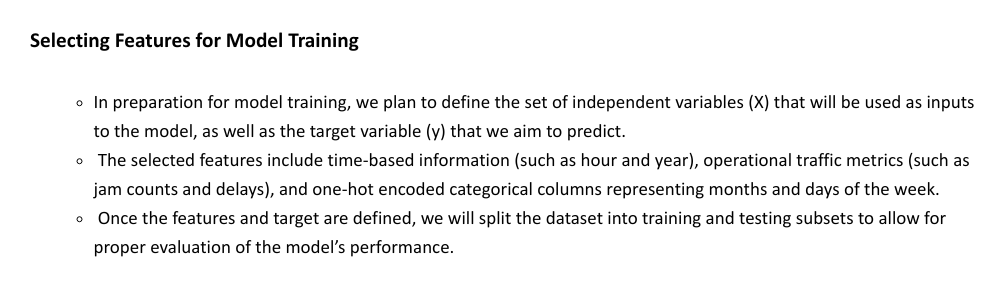

In [ ]:
# Displayed the list of all column names in the encoded dataset
print(df_encoded.columns)

Index(['Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength',
       'TrafficIndexWeekAgo', 'TravelTimeHistoric', 'TravelTimeLive', 'Year',
       'MonthNum', 'DayNum', 'Hour', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'Day_Monday', 'Day_Saturday', 'Day_Sunday',
       'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')


In [ ]:
# Selected the independent variables (features) to be used in modeling
X = df_encoded[[ 'Year', 'Hour','JamsCount', 'JamsDelay', 'JamsLength',
    'TrafficIndexWeekAgo', 'TravelTimeHistoric', 'TravelTimeLive','Month_August',
    'Month_December', 'Month_February', 'Month_January','Month_July', 'Month_June',
    'Month_March', 'Month_May','Month_November', 'Month_October', 'Month_September',
    'Day_Monday', 'Day_Saturday', 'Day_Sunday','Day_Thursday', 'Day_Tuesday', 'Day_Wednesday']]

# Selected the target variable (label)
y = df_encoded[['TrafficIndexLive']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


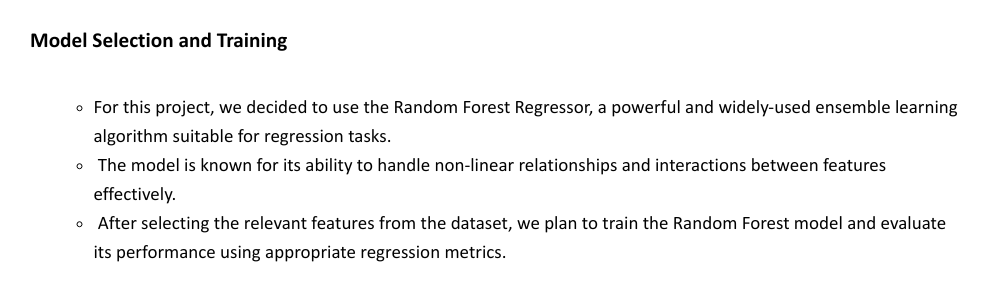

In [ ]:
# Initialized and trained the Random Forest model on the training data
prediction_model = RandomForestRegressor(n_estimators=50, max_depth=6, random_state=42)
prediction_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=50, random_state=42)

# 7- Test Model

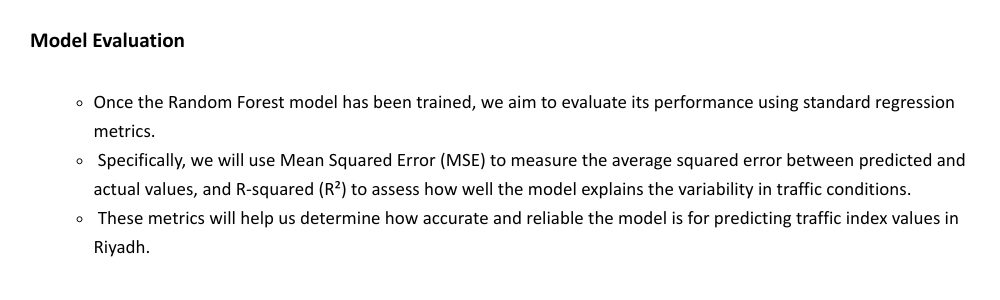

In [ ]:
# Made predictions using the Random Forest model
y_pred_RandomForestRegressor = prediction_model.predict(X_test)

# Calculated the Mean Squared Error for the predictions
mse_RandomForestRegressor = mean_squared_error(y_test, y_pred_RandomForestRegressor)
print(f'Mean Squared Error: {mse_RandomForestRegressor}')

# Calculated the R-squared score to evaluate model performance
r2_score_RandomForestRegressor = prediction_model.score(X_test, y_test)
print(f'R-squared: {r2_score_RandomForestRegressor}')

Mean Squared Error: 4.432687590857017
R-squared: 0.9863692373720336


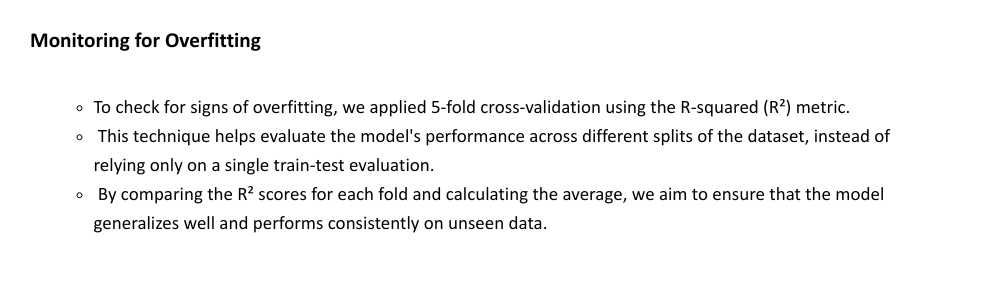

In [ ]:
# Imported the function to perform cross-validation scoring
from sklearn.model_selection import cross_val_score

# Performed 5-fold cross-validation using R-squared as the evaluation metric
scores = cross_val_score(prediction_model, X, y, cv=5, scoring='r2')

# Displayed the R² score for each fold
print("R2 Scores for each fold:", scores)

# Calculated and printed the average R² score across all folds
print("Mean R2:", scores.mean())

R2 Scores for each fold: [-0.18843367  0.98712075  0.99012579  0.99022953  0.98995155]
Mean R2: 0.7537987923360038
